## Introduction/Business Problem

### I will research and evaluate the dataset "car accident severity" in the city of Seattle in this final capstone project. I will analyze and determine how weather conditions affect the severity of car accidents. It's very common for people to relate bad weather to more road accidents, so we usually tend to drive more carefully when the weather is not favorable. Does bad weather directly translates to more car accidents? That is exactly what we will try to verify - if the bad weather play a big role in causing more car accidents.

## Data

### The dataset used for this final project is the Example Dataset, Data-Collisions, city of Seattle, provided by IBM/Cousera. The dataset includes data from 2004 to 2018 that address all types of collisions, it includes many types of attributes that can have some impact in the accident itself and the severity of it. The dataset consists of 194673, each row represents a accident consisting of 38 factors that may affect the severity of the accident.

## Methodology
### I used the IBM cloud Pak for Data - Watson Studio - to build a notebook and pushed the report on my Github repository to facilitalte review. I used Python as the primary language and imported numpy and pandas libraries. 
### I downloaded the cvs file, printed the data types to review the columns with the I needed to analyze my question.  I was able to  retrieve part of the data by printing the "head" of the cvs file. Then, I dropped all the columns I didn't need for this project and renamed the column I would be working with the purpose of making the reading of the results more intuitive. I grouped the data from the two colums (weather, number of accidents) by the weather, so I could get a count of the number of accidents by the weather condition. I downloaded matplotlib to build some data visualisation, histogram and bar graph, to analyse the results.

In [1]:
import numpy as np 
import pandas as pd

In [2]:
path = 'https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df = pd.read_csv(path)

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(df.dtypes) 

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [4]:
df.drop(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT','VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'ROADCOND','LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR' ], axis=1, inplace=True)

In [5]:
df.rename (columns = {'SEVERITYCODE':'Number of Accidents'}, inplace = True)


In [6]:
df.head()

,Number of Accidents,WEATHER
0,2,Overcast
1,1,Raining
2,1,Overcast
3,1,Clear
4,2,Raining


In [7]:
df.shape

(194673, 2)

In [8]:
df_sevweather = df.groupby('WEATHER', axis=0).count()
df_sevweather.head()

,Number of Accidents
WEATHER,
Blowing Sand/Dirt,56
Clear,111135
Fog/Smog/Smoke,569
Other,832
Overcast,27714


In [9]:
df["WEATHER"].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [10]:
df['Number of Accidents'].value_counts()

1    136485
2     58188
Name: Number of Accidents, dtype: int64

In [11]:
df["WEATHER"] = df["WEATHER"].str.lower()

In [12]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 
 
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


In [13]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_sevweather['Number of Accidents'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[7 1 2 0 0 0 0 0 0 1]
[5.00000e+00 1.11180e+04 2.22310e+04 3.33440e+04 4.44570e+04 5.55700e+04
 6.66830e+04 7.77960e+04 8.89090e+04 1.00022e+05 1.11135e+05]


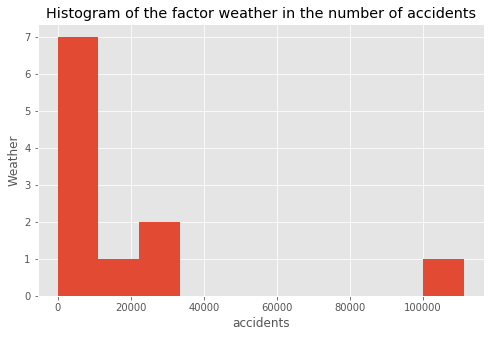

In [14]:
df_sevweather['Number of Accidents'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of the factor weather in the number of accidents') # add a title to the histogram
plt.ylabel('Weather') # add y-label
plt.xlabel('accidents') # add x-label

plt.show()

In [15]:
# let's create a new dataframe for the most common weather condition 
df_sevweather1 = df_sevweather.loc[['Clear', 'Raining', 'Snowing'], :]

# let's take a look at our dataframe
df_sevweather1

,Number of Accidents
WEATHER,
Clear,111135
Raining,33145
Snowing,907


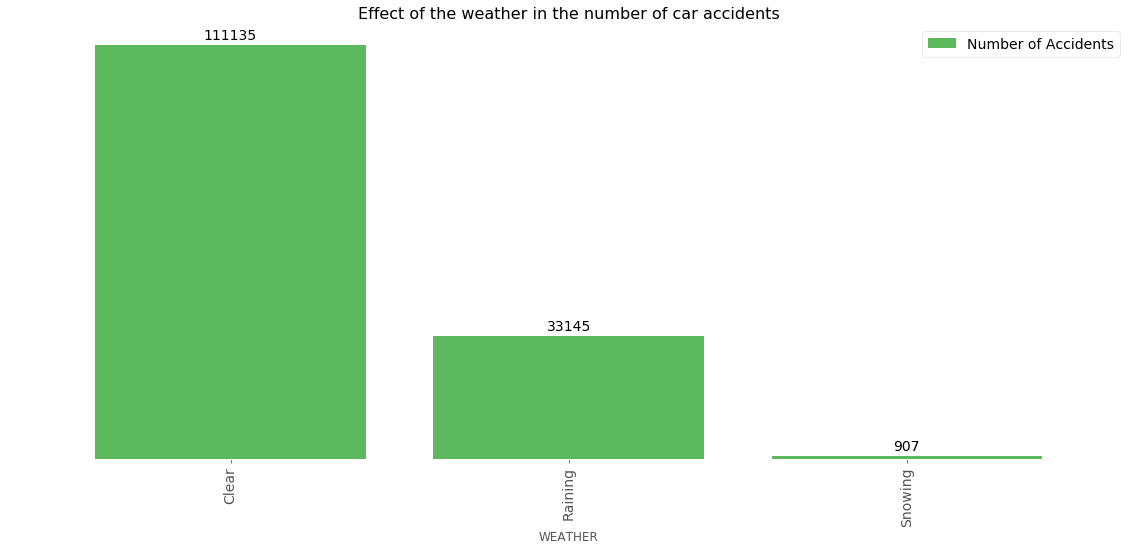

In [16]:
# Plotting
ax = df_sevweather1.plot(kind='bar', 
                figsize=(20, 8),
                rot=90,
                color = ['#5cb85c','#5bc0de','#d9534f'],
                width=.8,
                fontsize=14)


# Setting plot title
ax.set_title('Effect of the weather in the number of car accidents',fontsize=16)

# Setting figure background color
ax.set_facecolor('white')

# setting legend font size
ax.legend(fontsize=14,facecolor = 'white') 

# Removing the Border 
ax.get_yaxis().set_visible(False)

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )
plt.show()


## Results
### The results of the data is showing me that car accidents happen mostly in clear weather. Raining weather came in second with most number of accidents and surprisingly snow weather came in fifth behind overcast and unknown weather.

## Discussion
### I consider the results of this data to be completely unexpected as I always thought that bad weather increases the risk and it's associated with more car accidents. Every time it snows, I actually see more accidents in the roads. It's important to mention that this project just take in consideration the weather and there are many other factors that have a great influence in car accidents; for example, road conditions. Also, there are other relevant variables that aren't part of the dataset, such as time of the day, traffic condition, age of the driver etc. I understand that looking at only one variable for this kind of analysis doesn't mimic the reality. So, more variables we use to analyze car accidents, closer we will get from the reality.

## Conclusion

### If you take in consideration the weather as the only variable influencing car accidents, we will get unexpected results, such as snow weather have less accidents than clear weather. The results of this data tells me that most accidents occur in clear weather, while it may be true to this variable, we have limiting factors that may be more important than the weather in the occurrence of these accidents. Therefore, in order to have results that approximate form the reality other variables would need to be included in this study. 

# THANK YOU!